In [1]:

import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# Importing Data

In [2]:
book=pd.read_csv('C:\\Users\\VivekG\\Desktop\\My Files- Vivek\\ExcelrThane\\DS\\Assignments\\Recco_system\\book .csv',encoding_errors="replace")


In [3]:
book.head()

,sr.no,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


# EDA

In [4]:
#rename the column
book.rename({'sr.no':'index','User.ID': 'UserID','Book.Title': 'Book Title','Book.Rating':'Rating'}, axis=1,inplace=True)
book.set_index('index',inplace=True)
book

,UserID,Book Title,Rating
index,,,
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6
...,...,...,...
9996,162121,American Fried: Adventures of a Happy Eater.,7
9997,162121,Cannibal In Manhattan,9
9998,162121,How to Flirt: A Practical Guide,7


In [5]:
book.head()

,UserID,Book Title,Rating
index,,,
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6


In [6]:
book.tail()

,UserID,Book Title,Rating
index,,,
9996,162121,American Fried: Adventures of a Happy Eater.,7
9997,162121,Cannibal In Manhattan,9
9998,162121,How to Flirt: A Practical Guide,7
9999,162121,Twilight,8
10000,162129,Kids Say the Darndest Things,6


In [7]:
book.describe()

,UserID,Rating
count,10000.000000,10000.00000
mean,95321.249800,7.56630
std,117645.703609,1.82152
min,8.000000,1.00000
25%,2103.000000,7.00000
50%,3757.000000,8.00000
75%,162052.000000,9.00000
max,278854.000000,10.00000


In [8]:
book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      10000 non-null  int64 
 1   Book Title  10000 non-null  object
 2   Rating      10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 312.5+ KB


 Unique Users & Books

In [9]:
#number of unique users in the dataset
len(book['UserID'].unique())

2182

In [10]:
#number of unique book in the dataset
len(book['Book Title'].unique())

9659

In [11]:
print(book['Book Title'].unique())

['Classical Mythology' 'Clara Callan' 'Decision in Normandy' ...
 'How to Flirt: A Practical Guide' 'Twilight'
 'Kids Say the Darndest Things']


In [12]:
print("Total Unique books:",len(book['Book Title'].unique()))

Total Unique books: 9659


In [13]:
print("Total Unique books:",len(book['UserID'].unique()))

Total Unique books: 2182


In [14]:
book.duplicated().sum()

2

In [15]:
print(book[book.duplicated()].shape)
book[book.duplicated()]



(2, 3)


,UserID,Book Title,Rating
index,,,
5052,2152,Le nouveau soleil de Teur,7
7440,3757,The Magician's Tale,7


<AxesSubplot:>

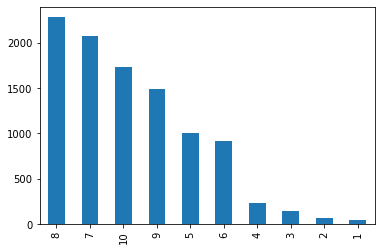

In [16]:
book['Rating'].value_counts().plot.bar()


In [17]:
book.groupby('Book Title')['Rating'].count().sort_values(ascending=False).head(10)

Book Title
Fahrenheit 451                                     5
Ender's Game (Ender Wiggins Saga (Paperback))      4
Stardust                                           4
Vanished                                           4
Charlie and the Chocolate Factory                  4
The Subtle Knife (His Dark Materials, Book 2)      4
The Amber Spyglass (His Dark Materials, Book 3)    4
The Golden Compass (His Dark Materials, Book 1)    3
Pet Sematary                                       3
My Side of the Mountain                            3
Name: Rating, dtype: int64

In [18]:
book.groupby('Book Title')['Rating'].mean().sort_values(ascending=False)

Book Title
Dr Mommy (From Here To Maternity) (Silhouette Desire, 1269)                                                           10.0
The Piano Man's Daughter                                                                                              10.0
Private Screening                                                                                                     10.0
The Pilates Body: The Ultimate At-Home Guide to Strengthening, Lengthening, and Toning Your Body--Without Machines    10.0
Desert Solitaire                                                                                                      10.0
                                                                                                                      ... 
Buster Midnight's Cafe                                                                                                 1.0
Fatal Care                                                                                                             1.0
The S

In [19]:
Ratings=pd.DataFrame(book.groupby('Book Title')['Rating'].mean())
Ratings

,Rating
Book Title,
"Jason, Madison &amp",8.0
Other Stories;Merril;1985;McClelland &amp,6.0
Repairing PC Drives &amp,4.0
'48,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0
...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",8.0
"\Well, there's your problem\: Cartoons",9.0
iI Paradiso Degli Orchi,7.0


In [20]:
Ratings['No_Of_rating']=pd.DataFrame(book.groupby('Book Title')['Rating'].count())
Ratings.head(5)

,Rating,No_Of_rating
Book Title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1


# Visualization

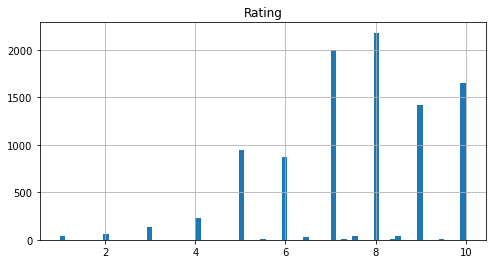

In [21]:
plt.figure(figsize=(8,4))
Ratings['Rating'].hist(bins=75)
plt.title("Rating");

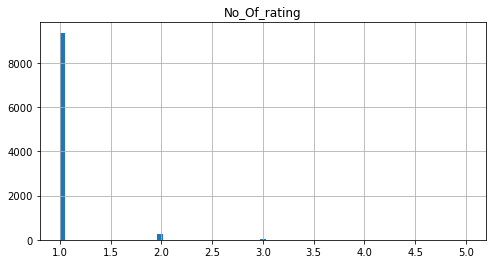

In [22]:
plt.figure(figsize=(8,4))
Ratings['No_Of_rating'].hist(bins=75)
plt.title("No_Of_rating");

Text(0.5, 1.0, 'Frequency')

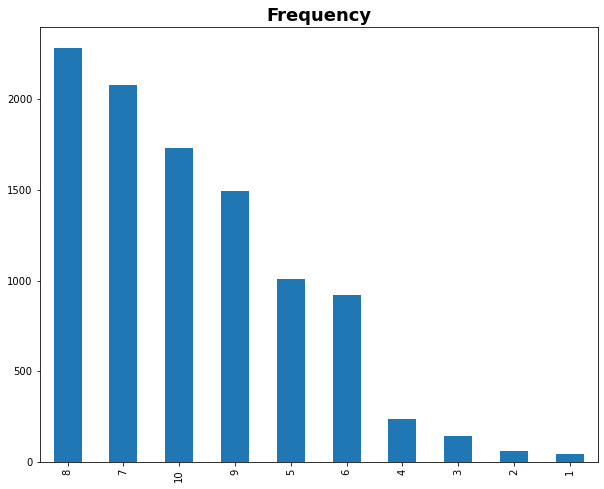

In [23]:
plt.figure(figsize=(10,8))
book['Rating'].value_counts().plot(kind='bar')
plt.title('Frequency',  fontsize = 18, fontweight = 'bold')


Users frequently gives the rating beteween 7 to 10.

# Find Popular Books ~ Users rating

In [24]:
# Lets Check which of the books prefered by the users according to their ratings.

Popular_books=book['Book Title'].value_counts().head(5)
Popular_books.index


Index(['Fahrenheit 451', 'Charlie and the Chocolate Factory',
       'The Subtle Knife (His Dark Materials, Book 2)', 'Vanished',
       'Ender's Game (Ender Wiggins Saga (Paperback))'],
      dtype='object')

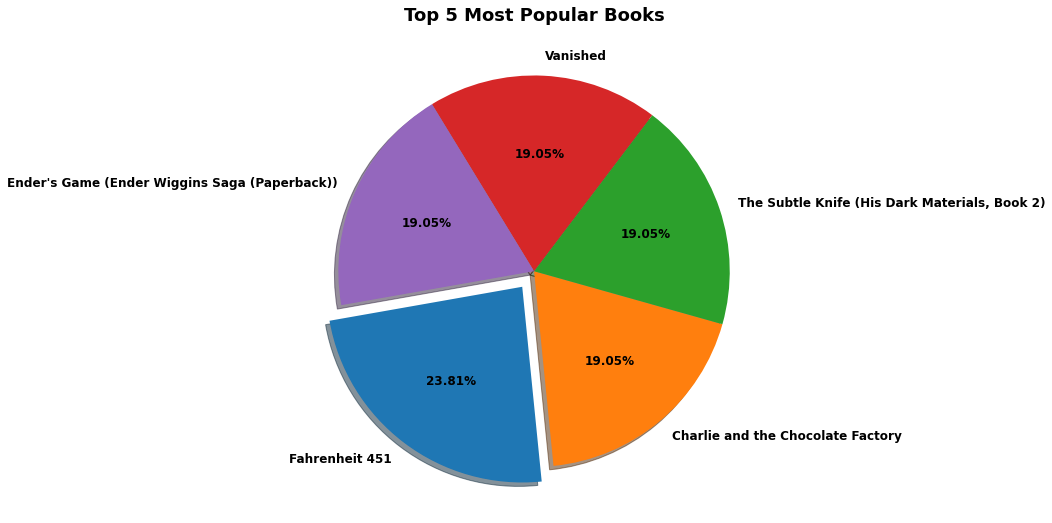

In [25]:
plt.figure(figsize = (16,9))
plt.pie(Popular_books,
       labels=Popular_books.index,
       explode = [0.1,0.0,0.0,0.0,0.0],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 190,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'color':'black'})
#plt.legend(loc= 'best')
plt.title("Top 5 Most Popular Books", fontsize = 18, fontweight = 'bold')
plt.show()

In [26]:
book

,UserID,Book Title,Rating
index,,,
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6
...,...,...,...
9996,162121,American Fried: Adventures of a Happy Eater.,7
9997,162121,Cannibal In Manhattan,9
9998,162121,How to Flirt: A Practical Guide,7


In [28]:
book.set_index(['UserID'], append=True)

,,Book Title,Rating
index,UserID,,
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6
...,...,...,...
9996,162121,American Fried: Adventures of a Happy Eater.,7
9997,162121,Cannibal In Manhattan,9
9998,162121,How to Flirt: A Practical Guide,7


# Pivot Table

In [29]:
user_book = book.pivot_table(index='UserID',
                                 columns='Book Title',
                                 values='Rating').fillna(0)

In [30]:
user_book

Book Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,�?�?bermorgen.
UserID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


# Calculating Cosine Similarity between Users


In [31]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation,jaccard
Ratings.sort_values('No_Of_rating',ascending=False).head(15)

,Rating,No_Of_rating
Book Title,,
Fahrenheit 451,7.000000,5
Ender's Game (Ender Wiggins Saga (Paperback)),6.250000,4
Stardust,8.500000,4
Vanished,6.500000,4
Charlie and the Chocolate Factory,6.500000,4
"The Subtle Knife (His Dark Materials, Book 2)",8.750000,4
"The Amber Spyglass (His Dark Materials, Book 3)",8.250000,4
"The Golden Compass (His Dark Materials, Book 1)",8.333333,3
Pet Sematary,7.666667,3


In [32]:
Vanished_user_Ratings=user_book['Vanished']
Strangers_users_Ratings=user_book['Strangers']
print(Strangers_users_Ratings)

UserID
8         0.0
9         0.0
10        0.0
12        0.0
14        0.0
         ... 
278846    0.0
278849    0.0
278851    0.0
278852    0.0
278854    0.0
Name: Strangers, Length: 2182, dtype: float64


In [33]:
equalto_Strangers=user_book.corrwith(Strangers_users_Ratings)
equalto_Vanished=user_book.corrwith(Vanished_user_Ratings)

corr_Strangers=pd.DataFrame(equalto_Strangers,columns=['Correlation'])
corr_Strangers.head()

,Correlation
Book Title,
"Jason, Madison &amp",-0.000793
Other Stories;Merril;1985;McClelland &amp,-0.000793
Repairing PC Drives &amp,-0.000793
'48,-0.000793
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000793


In [34]:
# Sort the Data by Correlation
corr_Strangers.sort_values('Correlation',ascending=False).head(5)

,Correlation
Book Title,
Strangers,1.000000
Brewing Up a Storm: A John Thatcher Mystery,0.628321
Rainbow Six,0.549682
Dark Rivers of the Heart,0.549682
Watchers,0.549682


In [35]:
corr_Strangers=corr_Strangers.join(Ratings['Rating'])
corr_Strangers.head()

,Correlation,Rating
Book Title,,
"Jason, Madison &amp",-0.000793,8.0
Other Stories;Merril;1985;McClelland &amp,-0.000793,6.0
Repairing PC Drives &amp,-0.000793,4.0
'48,-0.000793,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,-0.000793,8.0


# By using correlation Recommend simlar book to the users.


In [36]:
corr_Strangers[corr_Strangers['Rating']>5].sort_values('Correlation',ascending=False).head()

,Correlation,Rating
Book Title,,
Strangers,1.000000,7.333333
Brewing Up a Storm: A John Thatcher Mystery,0.628321,6.000000
A Cry In the Dark : Family Secrets: The Next Generation (Intimate Moments),0.549682,7.000000
Intensity,0.549682,7.000000
The Old Man and the Sea (A Scribner Classic),0.549682,7.000000


In [37]:
corr_Vanished=pd.DataFrame(equalto_Vanished,columns=['Correlation'])
corr_Vanished.dropna(inplace=True)
corr_Vanished=corr_Vanished.join(Ratings['Rating'])
corr_Vanished[corr_Vanished['Rating']>4].sort_values('Correlation',ascending=False).head()

,Correlation,Rating
Book Title,,
Vanished,1.000000,6.5
The Northern Lights,0.454464,8.0
Amistad,0.454464,6.0
Motherless Brooklyn,0.454464,5.0
Our Fathers,0.454464,5.0


In [38]:
user_book.head()

Book Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,�?�?bermorgen.
UserID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
user_sim= 1 - pairwise_distances( user_book.values,metric='cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [40]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
user_sim_df.iloc[:5,:5]

,0,1,2,3,4
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0


In [42]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [43]:
#Set the index and column names to user ids 
user_sim_df.index =list(user_book.index)
user_sim_df.columns = list(user_book.index)
user_sim_df

,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
book[(book['UserID']==8) | (book['UserID']==14)]

,UserID,Book Title,Rating
index,,,
2400,8,Ancient Celtic Romances,5
2401,8,The Western way: A practical guide to the West...,5
2402,8,Wings,5
2403,8,Truckers,5
2404,8,Keepers of the Earth Teachers Guide,6
2405,8,The Celts Activity Book,6
2406,8,The Art Of Celtia,7
2410,14,COPS,5
2411,14,A Cold Heart: An Alex Delaware Novel,5


In [45]:
#Most Similar Users
user_sim_df.idxmax(axis=1)[0:5]

8     8
9     8
10    8
12    8
14    8
dtype: int64

In [46]:
def give_reco(buyer_id):
    tem = list(user_sim_df.sort_values([buyer_id],ascending=False).head(100).index)
    #print('similar customer ids:',tem)
    book_list=[]
    for i in tem:
        book_list=book_list+list(book[book['UserID']==i]['Book Title'])
    #print('Common books within customer',book_list)
    return set(book_list)-set(book[book['UserID']==buyer_id]['Book Title'])


In [47]:
give_reco(10)

{"'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities",
 '20,001 Names for Baby',
 '24 Hours',
 '500 palabras nuevas para ti / 500 Words To Grow On',
 'A Cat in the Manger: An Alice Nestleton Mystery (Alice Nestleton Mysteries (Paperback))',
 'A Certain Justice: A Novel',
 "A Child's Night Dream",
 'A Darkness More Than Night',
 'A Dog Year: Twelve Months, Four Dogs, and Me',
 "A False Sense of Well Being (Ballantine Reader's Circle)",
 'A Flash in the Pan: 100 Fast and Furious Recipes for Wok and Stir-Fry',
 'A Free Man of Color (Benjamin January (Paperback))',
 'A GATHERING OF SAINTS',
 'A Lady Never Trifles with Thieves',
 'A Letter of Mary (Mary Russell Novels (Paperback))',
 'A Letter to Harvey Milk: Short Stories',
 'A Light in the Attic',
 'A Pocket Guide to Oahu',
 "A Single Tear: A Family's Persecution, Love, and Endurance in Communist China",
 'A Wreath for Rivera',
 'A lexicon of Jewish cooking: A collection of folklore, foodlore, history, customs, and reci

In [48]:
give_reco(12)

{"'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities",
 '20,001 Names for Baby',
 '24 Hours',
 '500 palabras nuevas para ti / 500 Words To Grow On',
 'A Cat in the Manger: An Alice Nestleton Mystery (Alice Nestleton Mysteries (Paperback))',
 'A Certain Justice: A Novel',
 "A Child's Night Dream",
 'A Darkness More Than Night',
 'A Dog Year: Twelve Months, Four Dogs, and Me',
 "A False Sense of Well Being (Ballantine Reader's Circle)",
 'A Flash in the Pan: 100 Fast and Furious Recipes for Wok and Stir-Fry',
 'A Free Man of Color (Benjamin January (Paperback))',
 'A GATHERING OF SAINTS',
 'A Lady Never Trifles with Thieves',
 'A Letter of Mary (Mary Russell Novels (Paperback))',
 'A Letter to Harvey Milk: Short Stories',
 'A Light in the Attic',
 'A Pocket Guide to Oahu',
 "A Single Tear: A Family's Persecution, Love, and Endurance in Communist China",
 'A Wreath for Rivera',
 'A lexicon of Jewish cooking: A collection of folklore, foodlore, history, customs, and reci

In [49]:
give_reco(16)

{"'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities",
 '20,001 Names for Baby',
 '24 Hours',
 '500 palabras nuevas para ti / 500 Words To Grow On',
 'A Cat in the Manger: An Alice Nestleton Mystery (Alice Nestleton Mysteries (Paperback))',
 'A Certain Justice: A Novel',
 "A Child's Night Dream",
 'A Darkness More Than Night',
 'A Dog Year: Twelve Months, Four Dogs, and Me',
 "A False Sense of Well Being (Ballantine Reader's Circle)",
 'A Flash in the Pan: 100 Fast and Furious Recipes for Wok and Stir-Fry',
 'A Free Man of Color (Benjamin January (Paperback))',
 'A GATHERING OF SAINTS',
 'A Lady Never Trifles with Thieves',
 'A Letter of Mary (Mary Russell Novels (Paperback))',
 'A Letter to Harvey Milk: Short Stories',
 'A Light in the Attic',
 'A Pocket Guide to Oahu',
 "A Single Tear: A Family's Persecution, Love, and Endurance in Communist China",
 'A Wreath for Rivera',
 'A lexicon of Jewish cooking: A collection of folklore, foodlore, history, customs, and reci